### Student Information
Name: 侯君葳

Student ID: 112591519

GitHub ID: victoriahou

Kaggle name: victoriahou

Kaggle private scoreboard snapshot: 

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

### Part1: Home excerise


#### Table Of Content
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [9]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/trainingPart/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/trainingPart/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/trainingPart/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/trainingPart/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [10]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [11]:
### testing data
anger_test = pd.read_csv("data/devPart/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/devPart/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/devPart/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/devPart/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [12]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [13]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [14]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
#Train set
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)

term_Frequencies = []
for j in range(0,X_counts.shape[1]):
    term_Frequencies.append(sum(X_counts[:,j].toarray()))
term_Frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Build df_term_Frequencies' dataframe
df_term_Frequencies = pd.DataFrame(columns = ["term", "frequencies"]) 

for i in range(len(term_Frequencies)):
    df_term_Frequencies.loc[i, "term"] = str(count_vect.get_feature_names_out()[i])
    df_term_Frequencies.loc[i, "frequencies"] = int(term_Frequencies[i])

Text(0, 0.5, 'frequency')

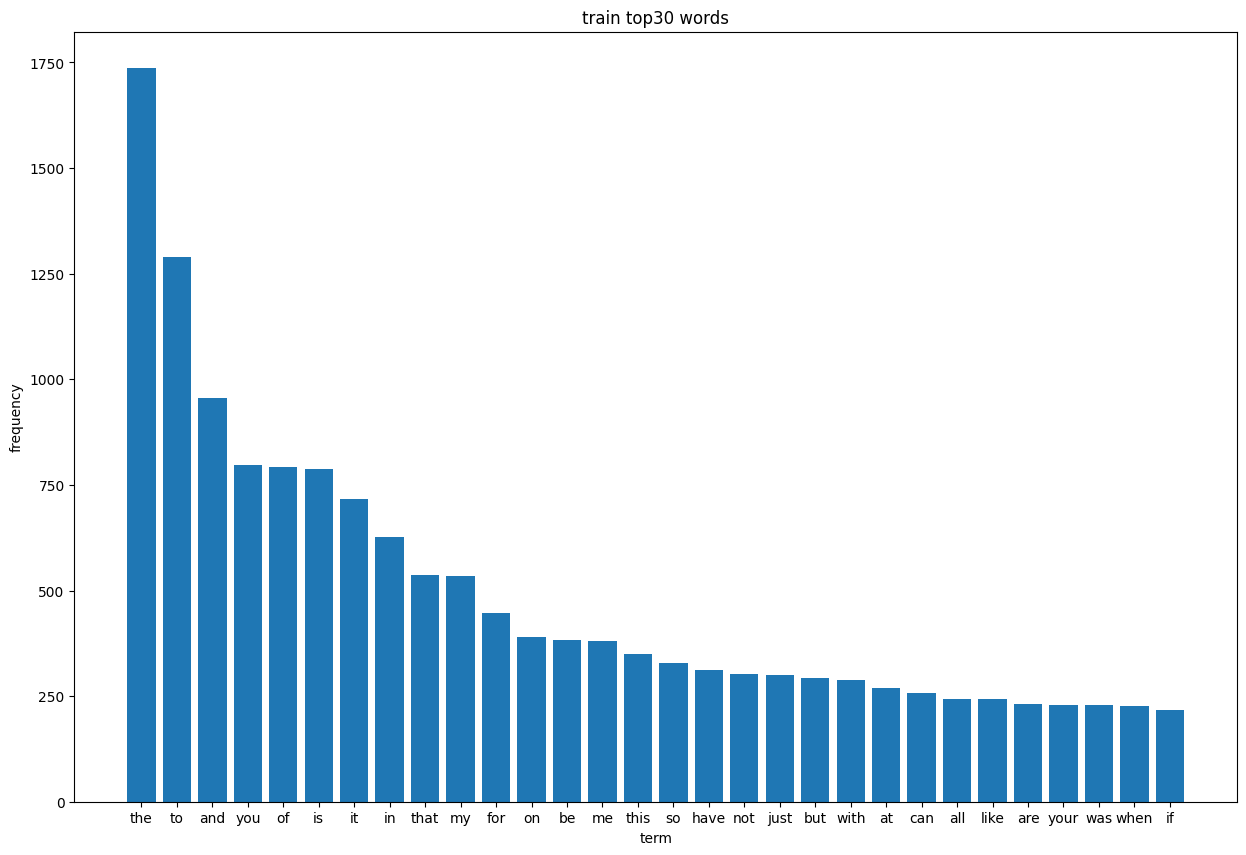

In [16]:
df_sort = df_term_Frequencies.sort_values('frequencies', ascending = False)
df_sort = df_sort[:30]

plt.figure(figsize=(15,10))
plt.bar(x=df_sort.term, height=df_sort.frequencies)
plt.title("train top30 words")
plt.xlabel('term')
plt.ylabel('frequency')

In [17]:
# Test set
count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df.text)

term_Frequencies = []
for j in range(0,test_counts.shape[1]):
    term_Frequencies.append(sum(test_counts[:,j].toarray()))
term_Frequencies = np.asarray(test_counts.sum(axis=0))[0]

# Build df_term_Frequencies dataframe
df_term_Frequencies = pd.DataFrame(columns = ["term", "frequencies"]) 

for i in range(len(term_Frequencies)):
    df_term_Frequencies.loc[i, "term"] = str(count_vect.get_feature_names_out()[i])
    df_term_Frequencies.loc[i, "frequencies"] = int(term_Frequencies[i])

Text(0, 0.5, 'frequency')

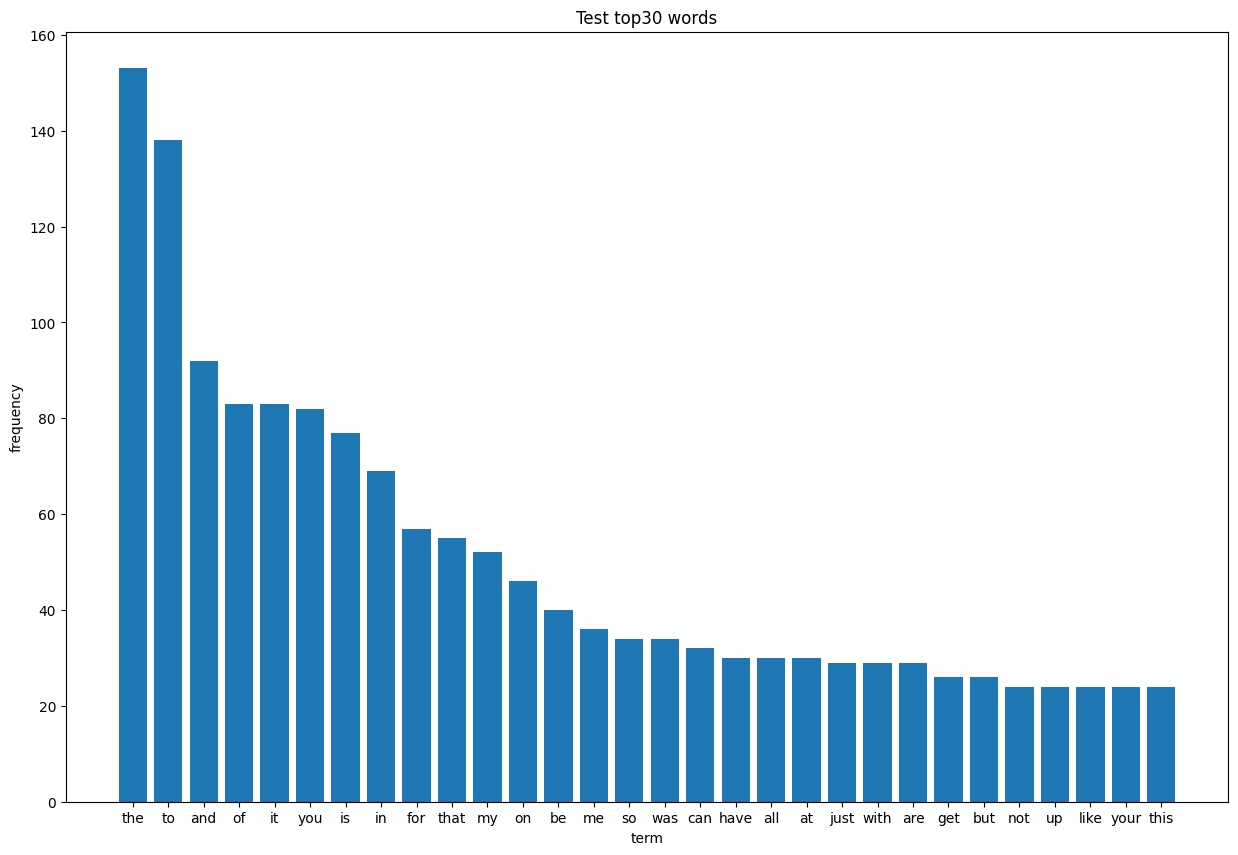

In [18]:
df_sort = df_term_Frequencies.sort_values('frequencies', ascending = False)
df_sort = df_sort[:30]

plt.figure(figsize=(15,10))
plt.bar(x=df_sort.term, height=df_sort.frequencies)
plt.title("Test top30 words")
plt.xlabel('term')
plt.ylabel('frequency')

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [19]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [20]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [21]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

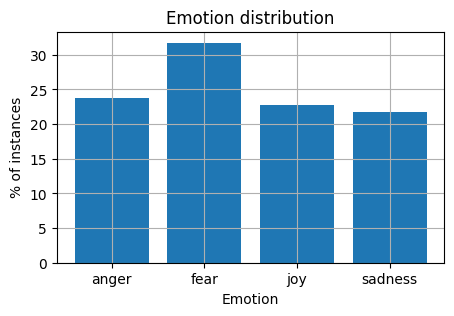

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [25]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [26]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [27]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [28]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [30]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [31]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [32]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\DM_hw2\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [33]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [35]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [36]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


# use TFIDF vectorizer
tfidf_Vecterizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

In [37]:
# apply TFIDF analyzer to training set
tfidf_Vecterizer.fit(train_df['text'])

TfidfVectorizer(max_features=1000,
                tokenizer=<function word_tokenize at 0x0000020F46566980>)

In [38]:
# transform to TFIDF features
train_data_TFIDF_features_1000 = tfidf_Vecterizer.transform(train_df['text'])

In [39]:
train_data_TFIDF_features_1000.shape

(3613, 1000)

In [40]:
# get feature names
feature_names_1000 = tfidf_Vecterizer.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

In [41]:
"😂" in feature_names_500

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [43]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'fear', 'joy', 'anger', 'anger', 'sadness',
       'fear', 'joy', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [44]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [45]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [46]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [47]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes)) 
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

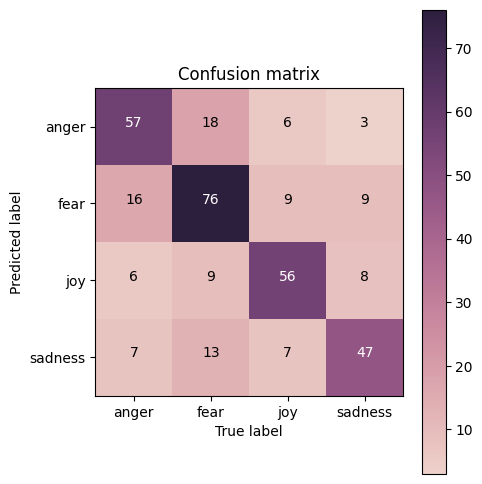

In [48]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here

The table constists of 4 kinds of emotions, which are anger, fear, joy and sadness.
From 'anger' column, we can know that there is 57+16+6+7 data belongs to 'anger'.
However, only 57 data is absolutely right. All the other data is mispredicted. 
Therefore, the confusion matrix helps us gets the exact results for better prediction instead of the accuracy


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [49]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

In [50]:
# build DecisionTree model
MNB_model = MultinomialNB()

# training
MNB_model = MNB_model.fit(X_train, y_train)

# predict
y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

# get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'fear', 'joy', 'sadness', 'anger', 'anger', 'joy',
       'anger', 'fear'], dtype='<U7')

In [51]:
# accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [52]:
# precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [53]:
# check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


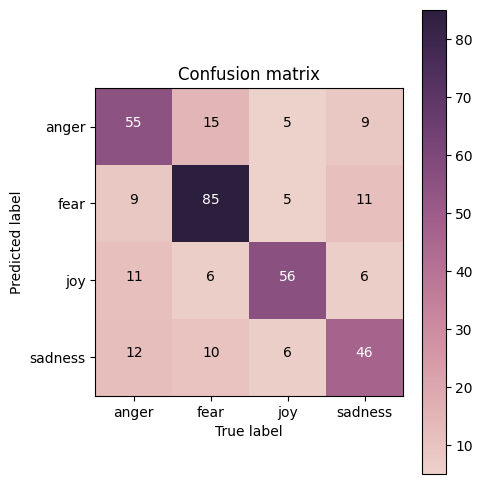

In [54]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here

The training accuracy in the Decision Tree is higher than the Naive Bayes model, and the testing accuracy is lower than the Naive Bayes model in the Desion Tree.

The main difference in the performance between these two models is the decision tree model is overfitting. 
Instead, Naive Bayes model use a simple linear hypothesis function.
It suffers from high bias because its hypothesis function is so simple that it can't accurately represent many complex situations.

Nevertheless, decision Tree needs huger amount of dataset to prevent overfitting from happenning.


## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)

### 6.1 Prepare data (X, y)

In [56]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.

In [57]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 907        fear
1269       fear
1127       fear
3076    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [58]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [60]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0   

### 6.4 Train

In [61]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('data/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


113/113 [==============================] - 3s 7ms/step - loss: 1.3289 - accuracy: 0.3656 - val_loss: 1.2596 - val_accuracy: 0.4813
Epoch 2/25
113/113 [==============================] - 0s 4ms/step - loss: 0.9718 - accuracy: 0.6538 - val_loss: 0.9001 - val_accuracy: 0.6599
Epoch 3/25
113/113 [==============================] - 1s 4ms/step - loss: 0.5638 - accuracy: 0.7946 - val_loss: 0.7813 - val_accuracy: 0.6974
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy: 0.8552 - val_loss: 0.7780 - val_accuracy: 0.6974
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3182 - accuracy: 0.8907 - val_loss: 0.8146 - val_accuracy: 0.6888
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.9178 - val_loss: 0.8927 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9300 - val_loss: 0.9013 - val_accuracy: 0.6945
Epoc

### 6.5 Predict on testing data

In [62]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 4ms/step


array([[9.2240405e-01, 7.3022239e-02, 1.1279306e-04, 4.4609220e-03],
       [9.8577219e-01, 4.4125975e-03, 9.2356540e-03, 5.7959475e-04],
       [2.0609024e-08, 9.2364788e-01, 6.8661342e-07, 7.6351427e-02],
       [2.1536478e-06, 3.3467793e-05, 9.9991894e-01, 4.5411321e-05],
       [9.8832992e-05, 8.0018406e-05, 1.8934159e-07, 9.9982101e-01]],
      dtype=float32)

In [63]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'fear', 'joy', 'sadness'], dtype=object)

In [64]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.7


In [65]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("data/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.365624,1.328853,0.481268,1.259632
1,1,0.653750,0.971838,0.659942,0.900149
2,2,0.794631,0.563774,0.697406,0.781285
3,3,0.855245,0.401531,0.697406,0.778009
4,4,0.890673,0.318234,0.688761,0.814563
5,5,0.917797,0.257320,0.682997,0.892716
6,6,0.929975,0.214326,0.694524,0.901347
7,7,0.946859,0.177252,0.694524,1.005996
8,8,0.953224,0.155153,0.691643,0.997791
9,9,0.959590,0.132463,0.685879,1.056947


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

Text(0, 0.5, 'Loss')

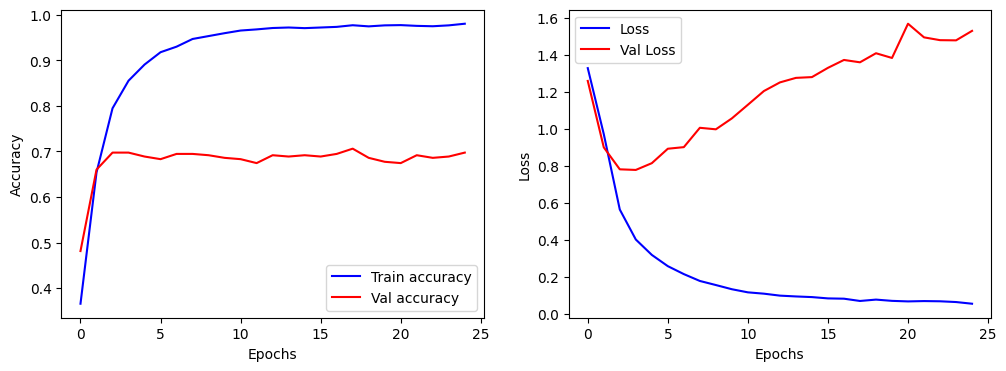

In [66]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(training_log['accuracy'],  "-b", label="Train accuracy")
ax[0].plot(training_log['val_accuracy'],  "-r", label="Val accuracy")
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(training_log['loss'],"-b",label="Loss")
ax[1].plot(training_log['val_loss'],"-r",label="Val Loss")
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

---
### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [67]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
907,20050,Today was horrible and it was only half a day,"[Today, was, horrible, and, it, was, only, hal..."
1269,20412,@ExpressScripts u shd b embrrssd. u jack up my...,"[@, ExpressScripts, u, shd, b, embrrssd, ., u,..."
1127,20270,@JaySekulow what can we do 2 get @realDonaldTr...,"[@, JaySekulow, what, can, we, do, 2, get, @, ..."
3076,40249,conflicting reports on mama #RitaMarley health...,"[conflicting, reports, on, mama, #, RitaMarley..."
1965,21108,@tannerfox awe cnt wait to see,"[@, tannerfox, awe, cnt, wait, to, see]"


In [68]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Today', 'was', 'horrible', 'and', 'it', 'was', 'only', 'half', 'a', 'day']),
       list(['@', 'ExpressScripts', 'u', 'shd', 'b', 'embrrssd', '.', 'u', 'jack', 'up', 'my', 'bp', 'meds', 'twice', 'and', 'it', 'will', 'still', 'take', '3-5', 'days', '?', 'Not', 'express', 'at', 'all', '.', '#', 'expressscripts', '#', 'horrible']),
       list(['@', 'JaySekulow', 'what', 'can', 'we', 'do', '2', 'get', '@', 'realDonaldTrump', '2', 'reveal', 'his', 'taxes', '?', 'That', 'is', 'the', 'immediate', 'danger', '.', 'But', 'u', 'will', 'not', 'answer', 'me', '.'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [70]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [71]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 3.38590920e-01,  4.17322129e-01,  1.79364294e-01,  5.05031586e-01,
       -4.70490962e-01, -7.51476884e-01,  3.87660623e-01,  9.42582071e-01,
       -4.95387822e-01, -4.35412943e-01, -7.52711296e-01, -5.88646293e-01,
       -2.90307403e-01,  8.82481411e-02, -9.49447453e-02, -5.17731130e-01,
        4.89124209e-01, -7.91384518e-01,  2.74360985e-01, -1.35225880e+00,
        8.21541131e-01,  4.96474832e-01,  4.21854258e-01,  1.59871623e-01,
        1.81499645e-01,  1.03917554e-01, -8.38451684e-01,  3.73477906e-01,
       -1.78750455e-02,  5.86238921e-01,  1.01265311e-01,  1.37824297e-01,
        6.38727069e-01, -3.33783835e-01, -2.00365975e-01,  8.87672603e-01,
        2.05952182e-01, -4.54666972e-01, -6.84398651e-01, -4.68269706e-01,
        3.15484285e-01, -3.48911166e-01, -4.31547351e-02,  8.48830119e-02,
        6.96287513e-01, -4.12223518e-01, -5.91241837e-01, -9.96279866e-02,
        9.71072018e-01,  5.09243846e-01, -6.95579499e-02, -5.78634799e-01,
        1.84391543e-01,  

In [72]:
#Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.9164111018180847),
 ('birthday', 0.9090115427970886),
 ('help', 0.906059741973877),
 ('blessed', 0.905143141746521),
 ('real', 0.9050042033195496),
 ('Humans', 0.9034579396247864),
 ('happier', 0.9030890464782715),
 ('smile', 0.9013645052909851),
 ('ya', 0.9003607630729675),
 ('Enjoy', 0.8977514505386353)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [73]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [75]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [77]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answer here

We can use the sentence by representing words with TF-IDF, and we can use this way to get the score of a sentence.
In this way , we may use the tf-idf score to forecast the type of the sentence like the above example, kings or queens.


### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [78]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [79]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [81]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [82]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [83]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

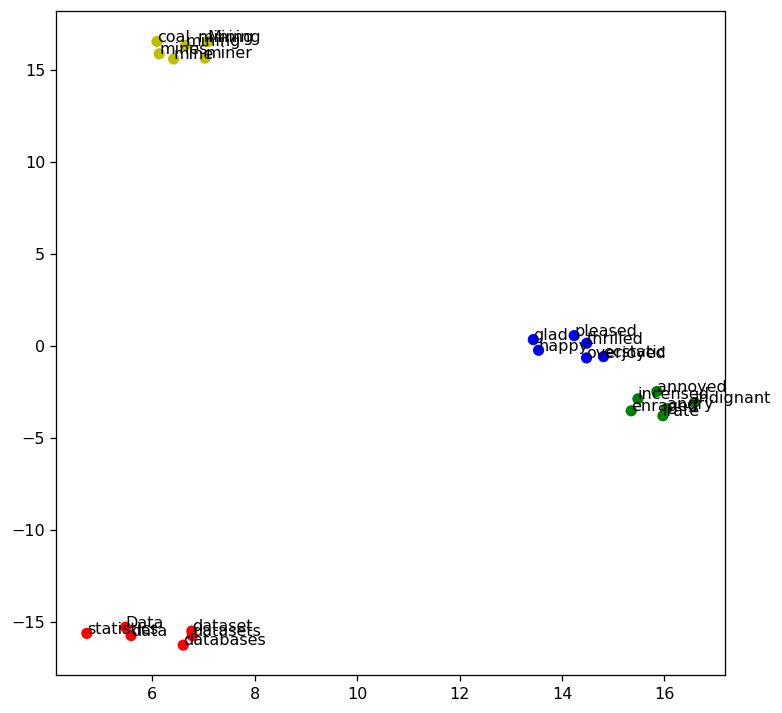

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [85]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)


target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

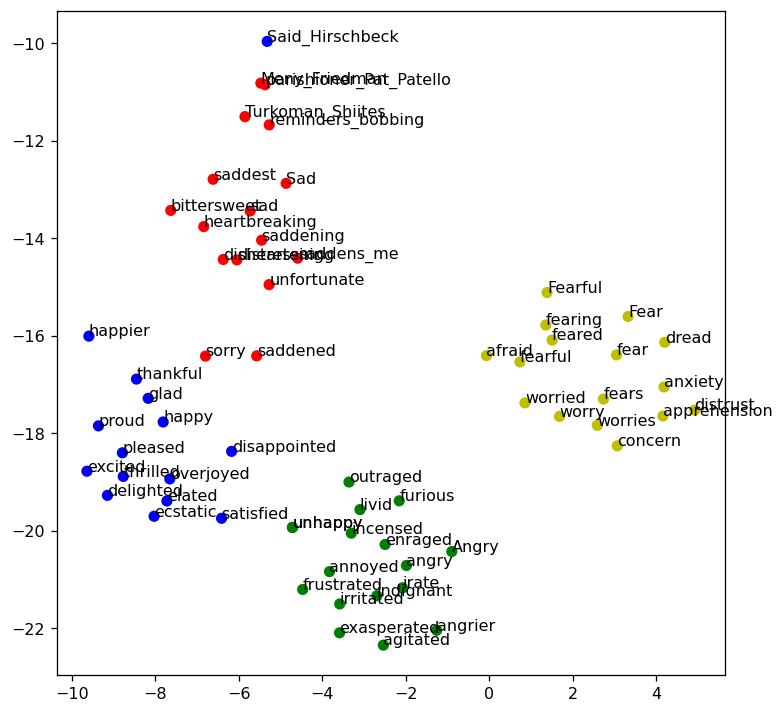

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')

### Part2: Kaggle competition

## 1. Data preparation

### 1.1 Load data
Load the json and csv files to each dataframe.

In [87]:
import pandas as pd
tweets = pd.read_json("data/tweets_DM.json", lines=True)
data_id = pd.read_csv("data/data_identification.csv") #, index_col='tweet_id')
emotion = pd.read_csv("data/emotion.csv")#, index_col='tweet_id')

print(data_id.shape)
data_id.head()

(1867535, 2)


,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


### 1.2 Set up dataframes 

In [89]:
#Extract only "tweet_id" and "text" from the json file.
tweet_id = [tweets['_source'][i]['tweet']['tweet_id'] for i in range(len(tweets['_source']))]
tweet_text = [tweets['_source'][i]['tweet']['text'] for i in range(len(tweets['_source']))]
tweet = pd.DataFrame({'tweet_id': tweet_id, 'text': tweet_text})

In [90]:
#Merge three dataframes into a single dataframe.
df = data_id.merge(emotion, on='tweet_id', how='outer').merge(tweet, on='tweet_id', how='outer')

In [91]:
#Split the dataframe into training / test dataframe
train_df = df[df['identification']=='train']
test_df = df[df['identification']=='test']

#Split the training dataframe into training / validation dataframe
val_df = train_df.sample(frac=0.2)
train_df = train_df[~train_df.index.isin(val_df.index)]

In [92]:
#Save the dataframe files
train_df.to_pickle("./train_df.pkl") 
test_df.to_pickle("./test_df.pkl")
val_df.to_pickle("./val_df.pkl")

## 2. Feature engineering

### 2.1 Define vectorizer

In [94]:
#Use "Bag of Words"

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
BOW500_vectorizer = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
# apply analyzer to training data
BOW500_vectorizer.fit(train_df['text'])

# Transform documents to matrix.
train_data_BOW_features_500 = BOW500_vectorizer.transform(train_df['text'])

## Check dimension
train_data_BOW_features_500.shape


(1164450, 500)

### 2.2 Set the training data and label.

In [96]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW500_vectorizer.transform(train_df['text'])
y_train = train_df['emotion']

X_val = BOW500_vectorizer.transform(val_df['text'])
y_val = val_df['emotion']# all of this sould be nan

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_val.shape: ', X_val.shape)
print('y_val.shape: ', y_val.shape)

X_train.shape:  (1164450, 500)
y_train.shape:  (1164450,)
X_val.shape:  (291113, 500)
y_val.shape:  (291113,)


In [97]:
y_train = train_df['emotion']
y_val = val_df['emotion']

In [118]:
#One-hot encoding to transform our categorical labels to numerical ones.
import keras

from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_val.shape: ', y_val.shape)

'''def label_encode(le, labels):
    enc = le.transform(labels)
    return to_categorical(enc)'''

def label_encode(le, labels):
    enc = le.transform(labels)
    return to_categorical(enc)


def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

'''y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

y_train_onehot = to_categorical(y_train_encoded)
y_val_onehot = to_categorical(y_val_encoded)'''

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_val.shape: ', y_val.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 1             joy
4           trust
5             joy
6    anticipation
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_val.shape:  (291113,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]

y_train.shape:  (1164450, 8)
y_val.shape:  (291113, 8)


## 3. Model architecture

### 3.1 Build the model

In [119]:
#Define input/output dimension

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


In [120]:
#Neural network architecture

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_6 (ReLU)              (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 re_lu_7 (ReLU)              (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 8)                 520       
                                                                 
 softmax_3 (Softmax)         (None, 8)                 0   

## 4. Training and testing process

### 4.1 Create logger and start training

In [121]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('data/training_log.csv')

# training setting
epochs = 25
batch_size = 32

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1164450, 500)
y_train shape: (1164450, 8)
X_val shape: (291113, 500)
y_val shape: (291113, 8)


In [122]:
# train
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_val, y_val))
print('training finish')

Epoch 1/25
36390/36390 [==============================] - 163s 4ms/step - loss: 1.4184 - accuracy: 0.4828 - val_loss: 1.3883 - val_accuracy: 0.4926
Epoch 2/25
36390/36390 [==============================] - 168s 5ms/step - loss: 1.3773 - accuracy: 0.4973 - val_loss: 1.3789 - val_accuracy: 0.4960
Epoch 3/25
36390/36390 [==============================] - 184s 5ms/step - loss: 1.3660 - accuracy: 0.5018 - val_loss: 1.3771 - val_accuracy: 0.4988
Epoch 4/25
36390/36390 [==============================] - 193s 5ms/step - loss: 1.3594 - accuracy: 0.5045 - val_loss: 1.3717 - val_accuracy: 0.5000
Epoch 5/25
36390/36390 [==============================] - 218s 6ms/step - loss: 1.3551 - accuracy: 0.5060 - val_loss: 1.3717 - val_accuracy: 0.4992
Epoch 6/25
36390/36390 [==============================] - 200s 5ms/step - loss: 1.3520 - accuracy: 0.5070 - val_loss: 1.3700 - val_accuracy: 0.5010
Epoch 7/25
36390/36390 [==============================] - 191s 5ms/step - loss: 1.3495 - accuracy: 0.5079 - val_

### 4.2 Test data

In [123]:
X_test = BOW500_vectorizer.transform(test_df['text'])

In [124]:
y_test_pred = model.predict(X_test)

12875/12875 [==============================] - 28s 2ms/step


In [125]:
#Decode the output vector into each category.

import numpy as np
y_test_pred = label_decode(label_encoder, y_test_pred)
test_df['emotion'] = y_test_pred

### 4.3 Save output to csv file.

In [128]:
header = ["tweet_id", "emotion"]
test_df.to_csv('output_NN1.csv', columns=header)

### Report

In the Kaggle competition, I referred to the training model of a Neural Network (NN). However, during the initial training phase, due to using Python version 3.9, which did not support the specific versions of Keras and TensorFlow I needed, the training of the model was incomplete. In this situation, the experimental result was only 0.17, which was very unsatisfactory.

Later on, I modified the relevant commands, resolving the compatibility issues between Keras and TensorFlow. This allowed me to complete the training of the neural network, ultimately raising the training result to 0.41. This achievement was significant.

After addressing the issues with the neural network, I further attempted to use other models such as Decision Tree (0.25), Random Forest (0.31), MultinomialNB (0.29), and XGBClassifier (0.24). The training results for these models are as mentioned a. Those model code can be checked in [hw_kagglepart]("hw_kagglepart.ipynb")ove.